In [1]:
from keras.datasets import imdb
from keras import models
from keras import layers
from itertools import islice
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


# Helper Functions

In [2]:
def take(n, iterable):
    # return first n items of the iterable as a list
    return list(islice(iterable, n))

# Data acquisition and exploration 

In [3]:
# num_words = 10000, means keep only top 10,000 most frequently occurring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)


C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
type(train_data)

numpy.ndarray

In [5]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
print(train_labels)

[1 0 0 ... 0 1 0]


In [7]:
maxima  = max(max(sequence) for sequence in train_data)
print(maxima)

9999


In [8]:
print(len(train_data))

25000


In [9]:
word_index = imdb.get_word_index()

sample_words = take(10, word_index.items())
sample_words

[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951),
 ('woods', 1408),
 ('spiders', 16115),
 ('hanging', 2345),
 ('woody', 2289),
 ('trawling', 52008)]

In [10]:
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
sample_reverse = take(10, reverse_word_index.items())
sample_reverse
# reverse_word_index

[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani'),
 (1408, 'woods'),
 (16115, 'spiders'),
 (2345, 'hanging'),
 (2289, 'woody'),
 (52008, 'trawling')]

# Technique testing

In [11]:
dictionary_one = {'Issa' : 655, 'Djeko': 766, 'Juma': 988 }
dictionary_one['Issa']

655

In [12]:
reverse_dict_one = dict([(value, key) for (key, value) in dictionary_one.items()])
reverse_dict_one[655]

'Issa'

In [13]:
decode_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])
print(decode_review)

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


# Data Preparation

In [14]:
def vectorize_sequences(sequences,  dimension=10000):
    # Creates an all zero matrixof shape (len(sequence), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [15]:
# Vectorize train and test data
x_train = vectorize_sequences(train_data)

# Vectorize test data
x_test = vectorize_sequences(test_data)

In [16]:
x_train[10000:]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [17]:
# Vectorize train and test labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

# Building a network

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Validating the approach

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

len(x_val)

10000

# Training

In [22]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 370us/step - loss: 0.5118 - accuracy: 0.7914 - val_loss: 0.3837 - val_accuracy: 0.8712
Epoch 2/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.3058 - accuracy: 0.9013 - val_loss: 0.3060 - val_accuracy: 0.8856
Epoch 3/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.2231 - accuracy: 0.9258 - val_loss: 0.2765 - val_accuracy: 0.8918
Epoch 4/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.1755 - accuracy: 0.9424 - val_loss: 0.3011 - val_accuracy: 0.8793
Epoch 5/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.1427 - accuracy: 0.9530 - val_loss: 0.2941 - val_accuracy: 0.8820
Epoch 6/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.1192 - accuracy: 0.9623 - val_loss: 0.3062 - val_accuracy: 0.8812
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

# Plotting training and validation loss

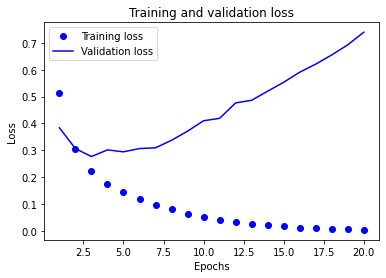

In [24]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # bo stand for blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # b stand for solid blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy

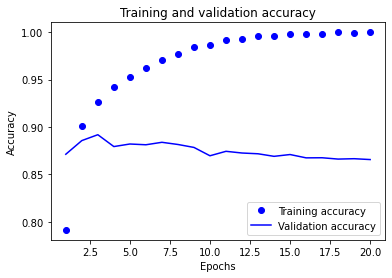

In [25]:
plt.clf() # clear a plotted figure

accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(accuracy_values) + 1)

plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Retrain a model from a scratch

In [26]:
# model architecture definition
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Model compilation
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 111us/step - loss: 0.4453 - accuracy: 0.8273
Epoch 2/4
25000/25000 [==============================] - 3s 109us/step - loss: 0.2587 - accuracy: 0.9104
Epoch 3/4
25000/25000 [==============================] - 3s 105us/step - loss: 0.2001 - accuracy: 0.9290
Epoch 4/4
25000/25000 [==============================] - 5s 192us/step


In [27]:
results

[0.2924993295621872, 0.8844799995422363]

In [28]:
print(x_test)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [29]:
model.predict(x_test)

array([[0.19921221],
       [0.9999151 ],
       [0.9631415 ],
       ...,
       [0.13844757],
       [0.07136439],
       [0.6108799 ]], dtype=float32)